In [2]:
#installing the necessary package 
! pip install -q 'gwosc==0.5.4' 
#checking which version was installed
import gwosc
print(gwosc.__version__) 

! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install matplotlib==3.1.3
#here i install all the packages that are needed to be able to do the exercise and load the data
# wget gets my data, the apth of were my data is is shown: my data is in the challenge folder, in the workshop3 folder . For every exercise I need 
#to specify which challenge i want to do. 
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf

# -- for gwpy 
from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge1.gwf', channel="H1:CHALLENGE1")

# -- for pycbc
from pycbc import frame
pycbc_strain = frame.read_frame('challenge1.gwf', 'H1:CHALLENGE1')

Reason for being yanked: Metadata is broken
0.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
--2022-02-14 19:12:27--  https://www.gw-openscience.org/s/workshop3/challenge/challenge1.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025674 (3.8M)
Saving to: ‘challenge1.gwf’

challenge1.gwf      100%[===================>]   3.84M  5.58MB/s    in 0.7s    

2022-02-14 19:12:28 (5.58 MB/s) - ‘challenge1.gwf’ saved [4025674/4025674]



In [10]:
# Exercise 1
# Figuring out the sample rate and the time of the signal 
# the sample rate is described by the inverse of dt and the duration of the signal is described by twice t0
print(gwpy_strain)
sample_rate = 1/gwpy_strain.dt 
duration = 2*gwpy_strain.t0
print('The sample rate is', sample_rate)
print('The duration of the signal is ', duration)

TimeSeries([ 1.09389188e-21,  1.21228706e-22,  1.64565889e-24,
            ..., -4.43135131e-23, -2.34576855e-22,
             4.51019899e-22]
           unit: ct,
           t0: -64.0 s,
           dt: 0.000244140625 s,
           name: H1:CHALLENGE1,
           channel: H1:CHALLENGE1)
The sample rate is 4096.0 1 / s
The duration of the signal is  -128.0 s


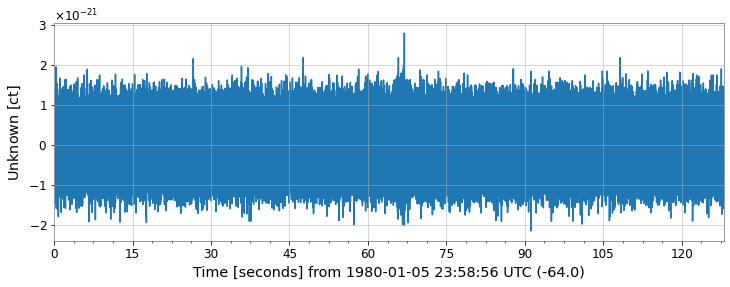

In [8]:
#Exercise 2
plot = gwpy_strain.plot()

I chose the q transform, because the spectogram didnt produyce satisfying results. A q transfrom is similar to a fast fourier transform, it is the  IFFT of some FFTed data plus a frequency shift times a windowing function.

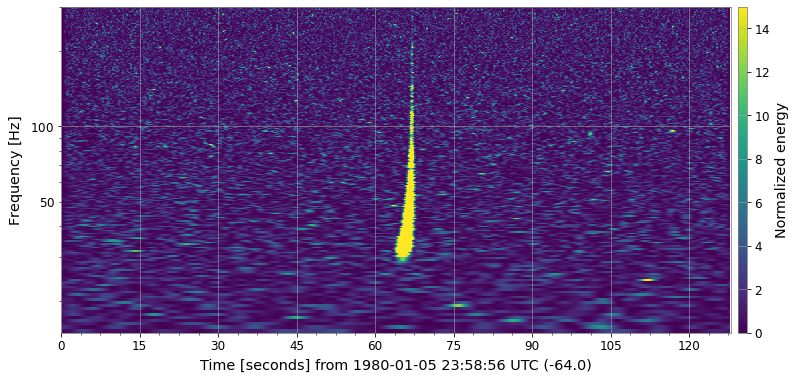

In [13]:
#Exercise 3
#Creating a Q transform to find the time of the merger
hq = gwpy_strain.q_transform(frange=(15, 300), qrange=(200, 400))
plot = hq.plot() #plotting the q-transform 
ax = plot.gca() #defining the axis
ax.set_yscale('log')  #scaling the y axis as a logarithmic 
plot.add_colorbar(cmap='viridis', label='Normalized energy') #adding a colorbar with the label 
plot.colorbars[0].mappable.set_clim(0,15) 


In [14]:
#Exercise 4
#looking at the Q transform to figure out the time of the merger, since the chirp is very visible here, it is rather easy
print('As visible from the last plot, the time of the merger is at around 64 seconds')

As visible from the last plot, the time of the merger is at around 64 seconds
